## Data Preparation

This Jupyter notebook is used to:

1. Clean the data (null values) and handle data types (such as timestamp).
2. One-Hot encode categorical features.
3. Standardize & Normalize continuous features.
4. Check correlations.
5. Write the result to single file, ready for ML model (model_*).

## 0. Load the data

In [1]:
# imports:
import pandas as pd
import matplotlib.pyplot as plt
import os

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'query_output_processing.csv'
print(INPUT_CSV)

raw_data = pd.read_csv(INPUT_CSV, low_memory=False)

# check that all columns are correctly loaded
raw_data.head()

/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_brute_force/query_output_processing.csv


originated_ip    uid      connection.uid connection.conn_state  \
0  192.168.10.25  0x1bd   CqqKhr94pleIYpAdc                    SF   
1  192.168.10.25  0x1be   CVPZSek28D5bfmBkc                    SF   
2  192.168.10.25  0x280   C1HX0H77DUj325Ngd                    SF   
3  192.168.10.25  0x41e  CgLGoR2ak6hohfIsAh                    SF   
4  192.168.10.25  0x437  Cm8LBY3QboCgmcyJXh                   SHR   

   connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0            40.590216                    866                      1890   
1            40.567314                   1579                      3023   
2             0.267944                   2276                      2964   
3             0.023941                     48                        76   
4             0.000047                      0                         0   

   connection.orig_p  connection.orig_pkts connection.proto  ...  \
0              49420                    25              tcp  ...   
1              49426                    28              tcp  ...   
2              49522                    13              tcp  ...   
3                123                     1              udp  ...   
4              49198                     0              udp  ...   

   resp_resp_similar_http_status_code_count  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   resp_resp_similar_http_user_agent_count  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   resp_resp_similar_ssl_version_count  resp_resp_similar_ssl_cipher_count  \
0                                    0                                   0   
1                                    0                                   0   
2                                    0                                   0   
3                                    0                                   0   
4                                    0                                   0   

  resp_resp_similar_ssl_curve_count  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

  resp_resp_similar_ssl_validation_status_count  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  resp_resp_similar_files_source_count  resp_resp_similar_file_md5_count  \
0                                    0                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   attacker_label  victim_label  
0              No            No  
1              No            No  
2              No            No  
3              No            No  
4              No            No  

[5 rows x 219 columns]

In [2]:
pd.set_option('display.max_columns', None)
raw_data

originated_ip       uid      connection.uid connection.conn_state  \
0      192.168.10.25     0x1bd   CqqKhr94pleIYpAdc                    SF   
1      192.168.10.25     0x1be   CVPZSek28D5bfmBkc                    SF   
2      192.168.10.25     0x280   C1HX0H77DUj325Ngd                    SF   
3      192.168.10.25     0x41e  CgLGoR2ak6hohfIsAh                    SF   
4      192.168.10.25     0x437  Cm8LBY3QboCgmcyJXh                   SHR   
...              ...       ...                 ...                   ...   
40736     172.16.0.1  0x2f5cba   CufzGdwvh99fGzwY6                    SF   
40737     172.16.0.1  0x2f5cbc  CO2iTd3VHJY140rSh4                    SF   
40738     172.16.0.1  0x2f5cd9  CeFvyI1X0uOgNSMP8j                    SF   
40739     172.16.0.1  0x2f5cdc  CF2Z6j1w5PL8hpe3d3                    SF   
40740     172.16.0.1  0x2f5cea  C5CG5v1vpwVRc5dLs1                    SF   

       connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0                40.590216                    866                      1890   
1                40.567314                   1579                      3023   
2                 0.267944                   2276                      2964   
3                 0.023941                     48                        76   
4                 0.000047                      0                         0   
...                    ...                    ...                       ...   
40736             5.348439                      0                       216   
40737             5.502284                      0                       216   
40738             5.506065                      0                       216   
40739             5.031095                      0                       216   
40740             5.242013                      0                       216   

       connection.orig_p  connection.orig_pkts connection.proto  \
0                  49420                    25              tcp   
1                  49426                    28              tcp   
2                  49522                    13              tcp   
3                    123                     1              udp   
4                  49198                     0              udp   
...                  ...                   ...              ...   
40736              60802                     4              tcp   
40737              60842                     4              tcp   
40738              58798                     4              tcp   
40739              58974                     4              tcp   
40740              59476                     4              tcp   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                      75519                     77291                443   
1                      34876                     36392                443   
2                       3220                      3696                443   
3                         48                        76                123   
4                        124                       180                137   
...                      ...                       ...                ...   
40736                      0                       112                 80   
40737                      0                       112                 80   
40738                      0                       112                 80   
40739                      0                       112                 80   
40740                      0                       112                 80   

       connection.resp_pkts connection.service                connection.ts  \
0                        44                ssl  2017-07-06T12:33:32.199062Z   
1                        29                ssl  2017-07-06T12:33:32.258791Z   
2                         9                ssl  2017-07-06T12:35:59.291704Z   
3                         1                ntp  2017-07-06T12:36:27.694263Z   
4                   

### Frequency percentage of labels:

In [3]:
raw_data['attacker_label'].value_counts()

No     39184
Yes     1557
Name: attacker_label, dtype: int64

In [4]:
count_attacker = pd.value_counts(raw_data['attacker_label'])
count_victim = pd.value_counts(raw_data['victim_label'])
percentage_df = pd.DataFrame({'Class':['Yes', 'No'], 'Frequency Percentage':[min(count_victim['Yes'], count_attacker['Yes'])/len(raw_data), 
                                                                             (len(raw_data) - min(count_victim['Yes'], count_attacker['Yes']))/len(raw_data)]})

In [5]:
percentage_df

Class  Frequency Percentage
0   Yes              0.038217
1    No              0.961783

<AxesSubplot:xlabel='Class'>

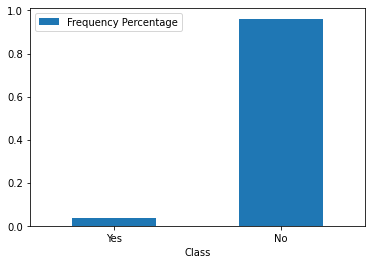

In [6]:
percentage_df.plot.bar(x='Class', y='Frequency Percentage', rot=0)

# Data cleaning & preparation

(https://www.keboola.com/blog/the-ultimate-guide-to-data-cleaning)

Possible problems:

1. Missing values (here only specific values in rows)
2. Data distribution (see more heavily represented ranges, check outliers)
3. Impossible values ("date == blue")
4. Data consistency (lower vs. uppercase)

### 1.0 Null values 

a) ignore

b) drop row/ column with these

c) fill in missing values

In [7]:
# clean garbage (null, NaN, ..)
pd.set_option('display.max_rows', None)
raw_data.isnull().sum()

originated_ip                                    0
uid                                              0
connection.uid                                   0
connection.conn_state                            0
connection.duration                              0
connection.orig_bytes                            0
connection.orig_ip_bytes                         0
connection.orig_p                                0
connection.orig_pkts                             0
connection.proto                                 0
connection.resp_bytes                            0
connection.resp_ip_bytes                         0
connection.resp_p                                0
connection.resp_pkts                             0
connection.service                               0
connection.ts                                    0
responded_ip                                     0
dns_count                                        0
ssh_count                                        0
http_count                     

In [8]:
pd.reset_option('display.max_rows')

In [9]:
raw_data[raw_data.isnull().any(axis=1)]

originated_ip       uid      connection.uid connection.conn_state  \
2735  109.201.130.58  0x10d730  CrRbKF3lLavCP8OhLc                   OTH   
3680  109.201.130.57  0x21a055  CezhQb4BPBuSF21OT8                   OTH   

      connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
2735             0.659549                    180                       264   
3680             0.659970                    240                       352   

      connection.orig_p  connection.orig_pkts connection.proto  \
2735                  3                     3             icmp   
3680                  3                     4             icmp   

      connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
2735                      0                         0                  3   
3680                      0                         0                  3   

      connection.resp_pkts connection.service                connection.ts  \
2735                     0               none  2017-07-06T13:15:13.371525Z   
3680                     0               none  2017-07-06T13:15:13.575971Z   

       responded_ip  dns_count  ssh_count  http_count  ssl_count  files_count  \
2735  192.168.10.12          0          0           0          0            0   
3680  192.168.10.12          0          0           0          0            0   

     dns_qtype dns_rcode ssh_auth_attempts ssh_host_key http_method  \
2735       NaN       NaN               NaN          NaN         NaN   
3680       NaN       NaN               NaN          NaN         NaN   

     http_status_code http_user_agent ssl_version ssl_cipher ssl_curve  \
2735              NaN             NaN         NaN        NaN       NaN   
3680              NaN             NaN         NaN        NaN       NaN   

     ssl_validation_status files_source file_md5 dns_dicts ssh_dicts  \
2735                   NaN          NaN      NaN       NaN       NaN   
3680                   NaN          NaN      NaN       NaN       NaN   

     http_dicts ssl_dicts files_dicts                   connection.time  \
2735        NaN       NaN         NaN  2017-07-06 13:15:13.371525+00:00   
3680        NaN       NaN         NaN  2017-07-06 13:15:13.575971+00:00   

      orig_orig_total  orig_orig_proto_tcp_count  orig_orig_proto_udp_count  \
2735                1                          0                          0   
3680                1                          0                          0   

      orig_orig_proto_icmp_count orig_orig_connection.protocol_mode  \
2735                           1                               icmp   
3680                           1                               icmp   

     orig_orig_connection.service_mode orig_orig_connection.conn_state_mode  \
2735                              none                                  OTH   
3680                              none                                  OTH   

           orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
2735  2017-07-06 13:15:13.371525120+00:00                            0.659549   
3680  2017-07-06 13:15:13.575971072+00:00                            0.659970   

      orig_orig_connection.orig_bytes_mean  \
2735                                 180.0   
3680                                 240.0   

      orig_orig_connection.orig_pkts_mean  \
2735                                  3.0   
3680                                  4.0   

      orig_orig_connection.resp_bytes_mean  \
2735                                   0.0   
3680                                   0.0   

      orig_orig_connection.resp_pkts_mean  orig_orig_orig_p_well_known_count  \
2735                                  0.0                                  1   
3680                                  0.0                                  1   

      orig_orig_orig_p_reg_or_dyn_count  orig_orig_resp_p_21_count  \
2735                                  0                          0   
3680                       

In [10]:
raw_data['dns_qtype'].fillna('[]', inplace = True)
raw_data['dns_rcode'].fillna('[]', inplace = True)
raw_data['ssh_auth_attempts'].fillna('[]', inplace = True)
raw_data['ssh_host_key'].fillna('[]', inplace = True)
raw_data['http_method'].fillna('[]', inplace = True)
raw_data['http_status_code'].fillna('[]', inplace = True)
raw_data['http_user_agent'].fillna('[]', inplace = True)
raw_data['ssl_version'].fillna('[]', inplace = True)
raw_data['ssl_cipher'].fillna('[]', inplace = True)
raw_data['ssl_curve'].fillna('[]', inplace = True)
raw_data['ssl_validation_status'].fillna('[]', inplace = True)
raw_data['files_source'].fillna('[]', inplace = True)
raw_data['file_md5'].fillna('[]', inplace = True)
raw_data['dns_dicts'].fillna('[]', inplace = True)
raw_data['ssh_dicts'].fillna('[]', inplace = True)
raw_data['http_dicts'].fillna('[]', inplace = True)
raw_data['ssl_dicts'].fillna('[]', inplace = True)
raw_data['files_dicts'].fillna('[]', inplace = True)

In [11]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [originated_ip, uid, connection.uid, connection.conn_state, connection.duration, connection.orig_bytes, connection.orig_ip_bytes, connection.orig_p, connection.orig_pkts, connection.proto, connection.resp_bytes, connection.resp_ip_bytes, connection.resp_p, connection.resp_pkts, connection.service, connection.ts, responded_ip, dns_count, ssh_count, http_count, ssl_count, files_count, dns_qtype, dns_rcode, ssh_auth_attempts, ssh_host_key, http_method, http_status_code, http_user_agent, ssl_version, ssl_cipher, ssl_curve, ssl_validation_status, files_source, file_md5, dns_dicts, ssh_dicts, http_dicts, ssl_dicts, files_dicts, connection.time, orig_orig_total, orig_orig_proto_tcp_count, orig_orig_proto_udp_count, orig_orig_proto_icmp_count, orig_orig_connection.protocol_mode, orig_orig_connection.service_mode, orig_orig_connection.conn_state_mode, orig_orig_connection.time_mean, orig_orig_connection.duration_mean, orig_orig_connection.orig_bytes_mean, orig_orig_connection.orig_pkts_mean, orig_orig_connection.resp_bytes_mean, orig_orig_connection.resp_pkts_mean, orig_orig_orig_p_well_known_count, orig_orig_orig_p_reg_or_dyn_count, orig_orig_resp_p_21_count, orig_orig_resp_p_22_count, orig_orig_resp_p_53_count, orig_orig_resp_p_80_count, orig_orig_resp_p_123_count, orig_orig_resp_p_443_count, orig_orig_resp_p_3389_count, orig_orig_resp_p_well_known_count, orig_orig_resp_p_reg_count, orig_orig_resp_p_dyn_count, orig_orig_dns_count_mean, orig_orig_ssh_count_mean, orig_orig_http_count_mean, orig_orig_ssl_count_mean, orig_orig_files_count_mean, orig_orig_similar_conns_count, orig_orig_similar_dns_qtype_count, orig_orig_similar_dns_rcode_count, orig_orig_similar_ssh_auth_attempts_count, orig_orig_similar_ssh_host_key_count, orig_orig_similar_http_method_count, orig_orig_similar_http_status_code_count, orig_orig_similar_http_user_agent_count, orig_orig_similar_ssl_version_count, orig_orig_similar_ssl_cipher_count, orig_orig_similar_ssl_curve_count, orig_orig_similar_ssl_validation_status_count, orig_orig_similar_files_source_count, orig_orig_similar_file_md5_count, orig_resp_total, orig_resp_proto_tcp_count, orig_resp_proto_udp_count, orig_resp_proto_icmp_count, orig_resp_connection.protocol_mode, orig_resp_connection.service_mode, orig_resp_connection.conn_state_mode, orig_resp_connection.time_mean, orig_resp_connection.duration_mean, orig_resp_connection.orig_bytes_mean, orig_resp_connection.orig_pkts_mean, orig_resp_connection.resp_bytes_mean, orig_resp_connection.resp_pkts_mean, orig_resp_orig_p_well_known_count, orig_resp_orig_p_reg_or_dyn_count, ...]
Index: []

In [12]:
data = raw_data.copy()

### 1.1 Time

Convert `date` type to `timestamp`.

In [13]:
data['orig_orig_connection.time_mean'].describe()

count                                   40741
unique                                   4550
top       2017-07-06 12:47:11.532130048+00:00
freq                                      709
Name: orig_orig_connection.time_mean, dtype: object

In [14]:
# connection.ts is in RFC 3339, ISO 8601 date format
# convert values of 'connections.ts' column to timestamp

import dateutil.parser # https://stackoverflow.com/questions/127803/how-do-i-parse-an-iso-8601-formatted-date
from datetime import datetime


def date_to_timestamp(connection_ts):
  date_format = dateutil.parser.isoparse(connection_ts)
  timestamp = datetime.timestamp(date_format)
  return timestamp

data['connection.time'] = data['connection.time'].map(lambda x: date_to_timestamp(x))
data['orig_orig_connection.time_mean'] = data['orig_orig_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['orig_resp_connection.time_mean'] = data['orig_resp_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['resp_orig_connection.time_mean'] = data['resp_orig_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['resp_resp_connection.time_mean'] = data['resp_resp_connection.time_mean'].map(lambda x: date_to_timestamp(x))


data.head()

originated_ip    uid      connection.uid connection.conn_state  \
0  192.168.10.25  0x1bd   CqqKhr94pleIYpAdc                    SF   
1  192.168.10.25  0x1be   CVPZSek28D5bfmBkc                    SF   
2  192.168.10.25  0x280   C1HX0H77DUj325Ngd                    SF   
3  192.168.10.25  0x41e  CgLGoR2ak6hohfIsAh                    SF   
4  192.168.10.25  0x437  Cm8LBY3QboCgmcyJXh                   SHR   

   connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0            40.590216                    866                      1890   
1            40.567314                   1579                      3023   
2             0.267944                   2276                      2964   
3             0.023941                     48                        76   
4             0.000047                      0                         0   

   connection.orig_p  connection.orig_pkts connection.proto  \
0              49420                    25              tcp   
1              49426                    28              tcp   
2              49522                    13              tcp   
3                123                     1              udp   
4              49198                     0              udp   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                  75519                     77291                443   
1                  34876                     36392                443   
2                   3220                      3696                443   
3                     48                        76                123   
4                    124                       180                137   

   connection.resp_pkts connection.service                connection.ts  \
0                    44                ssl  2017-07-06T12:33:32.199062Z   
1                    29                ssl  2017-07-06T12:33:32.258791Z   
2                     9                ssl  2017-07-06T12:35:59.291704Z   
3                     1                ntp  2017-07-06T12:36:27.694263Z   
4                     2                dns  2017-07-06T12:35:15.878393Z   

    responded_ip  dns_count  ssh_count  http_count  ssl_count  files_count  \
0   94.31.29.249          0          0           0          1            3   
1   157.240.2.25          0          0           0          1            2   
2  172.217.7.132          0          0           0          1            0   
3  17.253.14.253          0          0           0          0            0   
4  192.168.10.19          1          0           0          0            0   

  dns_qtype dns_rcode ssh_auth_attempts ssh_host_key http_method  \
0        []        []                []           []          []   
1        []        []                []           []          []   
2        []        []                []           []          []   
3        []        []                []           []          []   
4       [0]    [None]                []           []          []   

  http_status_code http_user_agent ssl_version  \
0               []              []  ['TLSv10']   
1               []              []  ['TLSv10']   
2               []              []  ['TLSv10']   
3               []              []          []   
4               []              []          []   

                         ssl_cipher ssl_curve ssl_validation_status  \
0  ['TLS_RSA_WITH_AES_128_CBC_SHA']    [None]                [None]   
1  ['TLS_RSA_WITH_AES_128_CBC_SHA']    [None]                [None]   
2  ['TLS_RSA_WITH_AES_128_CBC_SHA']    [None]                [None]   
3                                []        []                    []   
4                                []        []                    []   

  files_source                                           file_md5  \
0      ['SSL']  ['db78cbd190952735d940bc80ac2432c0', '1a9a69a8...   
1      ['SSL']  ['aaee5cf8b0d8596d2e0cbe67421cf7db', '2d95023d...   
2           []                                         

### Extract column names

In [15]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [16]:
selected_df = data[CONN_IDS_COLS +
                   CONN_NUMERICAL_COLS +
                   CONN_CATEGORICAL_COLS + 
                   CONN_APP_STATS +
                   ORIG_ORIG_NUMERICAL_COLS + 
                   ORIG_ORIG_CATEGORICAL_COLS +
                   ORIG_ORIG_PORTS_COLS + 
                   ORIG_ORIG_APP_STATS_COLS +
                   ORIG_ORIG_SIMILAR_COLS + 
                   ORIG_RESP_NUMERICAL_COLS + 
                   ORIG_RESP_CATEGORICAL_COLS + 
                   ORIG_RESP_PORTS_COLS + 
                   ORIG_RESP_APP_STATS_COLS + 
                   ORIG_RESP_SIMILAR_COLS + 
                   RESP_ORIG_NUMERICAL_COLS + 
                   RESP_ORIG_CATEGORICAL_COLS + 
                   RESP_ORIG_PORTS_COLS + 
                   RESP_ORIG_APP_STATS_COLS + 
                   RESP_ORIG_SIMILAR_COLS + 
                   RESP_RESP_NUMERICAL_COLS +
                   RESP_RESP_CATEGORICAL_COLS + 
                   RESP_RESP_PORTS_COLS +
                   RESP_RESP_APP_STATS_COLS +
                   RESP_RESP_SIMILAR_COLS +
                   BACKUP_COLS] # backup for later
selected_df.head(5)

connection.uid  originated_ip   responded_ip  connection.time  \
0   CqqKhr94pleIYpAdc  192.168.10.25   94.31.29.249     1.499344e+09   
1   CVPZSek28D5bfmBkc  192.168.10.25   157.240.2.25     1.499344e+09   
2   C1HX0H77DUj325Ngd  192.168.10.25  172.217.7.132     1.499345e+09   
3  CgLGoR2ak6hohfIsAh  192.168.10.25  17.253.14.253     1.499345e+09   
4  Cm8LBY3QboCgmcyJXh  192.168.10.25  192.168.10.19     1.499345e+09   

   connection.duration  connection.orig_p  connection.orig_bytes  \
0            40.590216              49420                    866   
1            40.567314              49426                   1579   
2             0.267944              49522                   2276   
3             0.023941                123                     48   
4             0.000047              49198                      0   

   connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      1890                    25                443   
1                      3023                    28                443   
2                      2964                    13                443   
3                        76                     1                123   
4                         0                     0                137   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                  75519                     77291                    44   
1                  34876                     36392                    29   
2                   3220                      3696                     9   
3                     48                        76                     1   
4                    124                       180                     2   

  connection.proto connection.service connection.conn_state  dns_count  \
0              tcp                ssl                    SF          0   
1              tcp                ssl                    SF          0   
2              tcp                ssl                    SF          0   
3              udp                ntp                    SF          0   
4              udp                dns                   SHR          1   

   ssh_count  http_count  ssl_count  files_count  orig_orig_total  \
0          0           0          1            3              223   
1          0           0          1            2              223   
2          0           0          1            0              229   
3          0           0          0            0              227   
4          0           0          0            0              230   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                    1.499344e+09                           13.951992   
1                    1.499344e+09                           13.951992   
2                    1.499345e+09                           14.524769   
3                    1.499345e+09                           13.472752   
4                    1.499345e+09                           14.461516   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                            15.878924                           1028.874439   
1                            15.878924                           1028.874439   
2                            15.711790                           1016.091703   
3                            15.850220                           1015.431718   
4                            15.656522                           1012.082609   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                          15872.766816                            16.721973   
1                          15872.766816                            16.721973   
2                          15497.262009                            16.445415   
3                          15588.955947                            16.528634   
4                          15429.673913                            16.386957   

  orig_orig_co

### 1.2 Handle IP addresses:

Possible approaches:

1. one-hot (but too many, vector will be too big + the information about "closer" IP addresses gets lost anyway)
2. somehow convert to a number so that the closeness is preserved 

In [17]:
# https://stackoverflow.com/questions/5619685/conversion-from-ip-string-to-integer-and-backward-in-python

import socket
import struct

def ip2int(addr):
  return struct.unpack("!I", socket.inet_aton(addr))[0]

def int2ip(addr):
  return socket.inet_ntoa(struct.pack("!I", addr))

# print(ip2int('9.6# 44.13'))
# print(ip2int('9.# .44.14'))
# print(ip2int('9# 6.45.14'))
# print(ip2int('9# 6.44.255'))
# print(ip2int('1# .66.44.13'))
# print(ip2# t('0.0.0.0'))
# print(ip2int('255.255.255.255'))

In [18]:
pd.options.mode.chained_assignment = None # for warning (I really do want to update the copy here)

selected_df['responded_ip_num'] = 0
selected_df['originated_ip_num'] = 0

for i in selected_df.index:
    try:
        selected_df.at[i, 'responded_ip_num'] = ip2int(selected_df.at[i, 'responded_ip'])
        selected_df.at[i, 'originated_ip_num'] = ip2int(selected_df.at[i, 'originated_ip'])
    except:
        print(i)
        print(selected_df.at[i, 'responded_ip'])
        print(selected_df.at[i, 'originated_ip'])
        selected_df.drop(i)

### 1.3 Handle ports:

Take in consideration external information:

Responded: 

- 21, 22, 53, 80, 123, 443, 3389
- 0 - 1023 *well known ports*
- 1024 - 49151 *registered*
- 49152 - 65535 *dynamic*

Originated: 

- 0 - 1023 *well known ports*
- 1024 - 49151 *registered*, 49152 - 65535 *dynamic*

==> create categories

One-hot encoding is useless again (too many possibilities), some have special meaning (20, 21 FTP; 80 HTTP; 110 POP3; ...), but for e.g. port scan it can be useful to also preserve that some ports are "close" to each other.


In [19]:
# 21, 22, 53, 80, 123, 443, 3389
# 0 - 1023 well known ports
# 1024 - 49151 registered
# 49152 - 65535 dynamic

common_ports_mapper = {
    21: 'resp_21',
    22: 'resp_22',
    53: 'resp_53',
    80: 'resp_80',
    123: 'resp_123',
    443: 'resp_443',
    3389: 'resp_3389',
}

def resp_port_cat_vals(value):
  if value in common_ports_mapper.keys():
    return common_ports_mapper[value]
  if value < 1024: 
    return 'resp_well_known'
  if value < 49152: 
    return 'resp_reg'
  return 'resp_dyn'

def orig_port_cat_vals(value):
  if value < 1024: 
    return 'orig_well_known'
  return 'orig_reg_or_dyn'

In [20]:
selected_df['orig_p_cat'] = ''
selected_df['resp_p_cat'] = ''

for i in selected_df.index:
    selected_df.at[i, 'orig_p_cat'] = orig_port_cat_vals(selected_df.at[i, 'connection.orig_p'])
    selected_df.at[i, 'resp_p_cat'] = resp_port_cat_vals(selected_df.at[i, 'connection.resp_p'])

selected_df.head()

connection.uid  originated_ip   responded_ip  connection.time  \
0   CqqKhr94pleIYpAdc  192.168.10.25   94.31.29.249     1.499344e+09   
1   CVPZSek28D5bfmBkc  192.168.10.25   157.240.2.25     1.499344e+09   
2   C1HX0H77DUj325Ngd  192.168.10.25  172.217.7.132     1.499345e+09   
3  CgLGoR2ak6hohfIsAh  192.168.10.25  17.253.14.253     1.499345e+09   
4  Cm8LBY3QboCgmcyJXh  192.168.10.25  192.168.10.19     1.499345e+09   

   connection.duration  connection.orig_p  connection.orig_bytes  \
0            40.590216              49420                    866   
1            40.567314              49426                   1579   
2             0.267944              49522                   2276   
3             0.023941                123                     48   
4             0.000047              49198                      0   

   connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      1890                    25                443   
1                      3023                    28                443   
2                      2964                    13                443   
3                        76                     1                123   
4                         0                     0                137   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                  75519                     77291                    44   
1                  34876                     36392                    29   
2                   3220                      3696                     9   
3                     48                        76                     1   
4                    124                       180                     2   

  connection.proto connection.service connection.conn_state  dns_count  \
0              tcp                ssl                    SF          0   
1              tcp                ssl                    SF          0   
2              tcp                ssl                    SF          0   
3              udp                ntp                    SF          0   
4              udp                dns                   SHR          1   

   ssh_count  http_count  ssl_count  files_count  orig_orig_total  \
0          0           0          1            3              223   
1          0           0          1            2              223   
2          0           0          1            0              229   
3          0           0          0            0              227   
4          0           0          0            0              230   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                    1.499344e+09                           13.951992   
1                    1.499344e+09                           13.951992   
2                    1.499345e+09                           14.524769   
3                    1.499345e+09                           13.472752   
4                    1.499345e+09                           14.461516   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                            15.878924                           1028.874439   
1                            15.878924                           1028.874439   
2                            15.711790                           1016.091703   
3                            15.850220                           1015.431718   
4                            15.656522                           1012.082609   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                          15872.766816                            16.721973   
1                          15872.766816                            16.721973   
2                          15497.262009                            16.445415   
3                          15588.955947                            16.528634   
4                          15429.673913                            16.386957   

  orig_orig_co

### 2. One-Hot encode categorical features for PCA:

- newly created port categories
- connection.proto
- connection.service
- connection.conn_state

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# custom one hot encoder that just directly assigns correct names to columns
class OneHotEncoderWithColNames(BaseEstimator, TransformerMixin):

    def __init__(self, **kwargs):
        self.feature_names = []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        result = pd.get_dummies(X)
        print(result.columns)
        self.feature_names = result.columns

        return result

#### 2.0 Ports:

In [22]:
ohe_orig_p = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_orig_p_df = pd.DataFrame(ohe_orig_p.fit_transform(selected_df[['orig_p_cat']]))
selected_df = selected_df.join(ohe_orig_p_df)

ohe_resp_p = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_resp_p_df = pd.DataFrame(ohe_resp_p.fit_transform(selected_df[['resp_p_cat']]))
selected_df = selected_df.join(ohe_resp_p_df)
selected_df

Index(['orig_p_cat_orig_reg_or_dyn', 'orig_p_cat_orig_well_known'], dtype='object')
Index(['resp_p_cat_resp_123', 'resp_p_cat_resp_21', 'resp_p_cat_resp_22',
       'resp_p_cat_resp_443', 'resp_p_cat_resp_53', 'resp_p_cat_resp_80',
       'resp_p_cat_resp_dyn', 'resp_p_cat_resp_reg',
       'resp_p_cat_resp_well_known'],
      dtype='object')


connection.uid  originated_ip   responded_ip  connection.time  \
0       CqqKhr94pleIYpAdc  192.168.10.25   94.31.29.249     1.499344e+09   
1       CVPZSek28D5bfmBkc  192.168.10.25   157.240.2.25     1.499344e+09   
2       C1HX0H77DUj325Ngd  192.168.10.25  172.217.7.132     1.499345e+09   
3      CgLGoR2ak6hohfIsAh  192.168.10.25  17.253.14.253     1.499345e+09   
4      Cm8LBY3QboCgmcyJXh  192.168.10.25  192.168.10.19     1.499345e+09   
...                   ...            ...            ...              ...   
40736   CufzGdwvh99fGzwY6     172.16.0.1  192.168.10.50     1.499348e+09   
40737  CO2iTd3VHJY140rSh4     172.16.0.1  192.168.10.50     1.499348e+09   
40738  CeFvyI1X0uOgNSMP8j     172.16.0.1  192.168.10.50     1.499348e+09   
40739  CF2Z6j1w5PL8hpe3d3     172.16.0.1  192.168.10.50     1.499348e+09   
40740  C5CG5v1vpwVRc5dLs1     172.16.0.1  192.168.10.50     1.499348e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                40.590216              49420                    866   
1                40.567314              49426                   1579   
2                 0.267944              49522                   2276   
3                 0.023941                123                     48   
4                 0.000047              49198                      0   
...                    ...                ...                    ...   
40736             5.348439              60802                      0   
40737             5.502284              60842                      0   
40738             5.506065              58798                      0   
40739             5.031095              58974                      0   
40740             5.242013              59476                      0   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          1890                    25                443   
1                          3023                    28                443   
2                          2964                    13                443   
3                            76                     1                123   
4                             0                     0                137   
...                         ...                   ...                ...   
40736                       216                     4                 80   
40737                       216                     4                 80   
40738                       216                     4                 80   
40739                       216                     4                 80   
40740                       216                     4                 80   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                      75519                     77291                    44   
1                      34876                     36392                    29   
2                       3220                      3696                     9   
3                         48                        76                     1   
4                        124                       180                     2   
...                      ...                       ...                   ...   
40736                      0                       112                     2   
40737                      0                       112                     2   
40738                      0                       112                     2   
40739                      0                       112                     2   
40740                      0                       112                     2   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp                ssl                    SF          0   
1                  tcp                ssl                    SF          0   
2                  tcp                ssl                    SF          0   
3                  udp                ntp      

In [23]:
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

#### 2.1 Protocols:

In [24]:
ohe_proto = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_proto_df = pd.DataFrame(ohe_proto.fit_transform(selected_df[['connection.proto']]))

OHE_PROTO_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_proto_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_proto_df.columns:
    OHE_PROTO_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_proto_df)
selected_df

Index(['connection.proto_icmp', 'connection.proto_tcp',
       'connection.proto_udp'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_brute_force/ohe_proto_cat_cols.txt


connection.uid  originated_ip   responded_ip  connection.time  \
0       CqqKhr94pleIYpAdc  192.168.10.25   94.31.29.249     1.499344e+09   
1       CVPZSek28D5bfmBkc  192.168.10.25   157.240.2.25     1.499344e+09   
2       C1HX0H77DUj325Ngd  192.168.10.25  172.217.7.132     1.499345e+09   
3      CgLGoR2ak6hohfIsAh  192.168.10.25  17.253.14.253     1.499345e+09   
4      Cm8LBY3QboCgmcyJXh  192.168.10.25  192.168.10.19     1.499345e+09   
...                   ...            ...            ...              ...   
40736   CufzGdwvh99fGzwY6     172.16.0.1  192.168.10.50     1.499348e+09   
40737  CO2iTd3VHJY140rSh4     172.16.0.1  192.168.10.50     1.499348e+09   
40738  CeFvyI1X0uOgNSMP8j     172.16.0.1  192.168.10.50     1.499348e+09   
40739  CF2Z6j1w5PL8hpe3d3     172.16.0.1  192.168.10.50     1.499348e+09   
40740  C5CG5v1vpwVRc5dLs1     172.16.0.1  192.168.10.50     1.499348e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                40.590216              49420                    866   
1                40.567314              49426                   1579   
2                 0.267944              49522                   2276   
3                 0.023941                123                     48   
4                 0.000047              49198                      0   
...                    ...                ...                    ...   
40736             5.348439              60802                      0   
40737             5.502284              60842                      0   
40738             5.506065              58798                      0   
40739             5.031095              58974                      0   
40740             5.242013              59476                      0   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          1890                    25                443   
1                          3023                    28                443   
2                          2964                    13                443   
3                            76                     1                123   
4                             0                     0                137   
...                         ...                   ...                ...   
40736                       216                     4                 80   
40737                       216                     4                 80   
40738                       216                     4                 80   
40739                       216                     4                 80   
40740                       216                     4                 80   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                      75519                     77291                    44   
1                      34876                     36392                    29   
2                       3220                      3696                     9   
3                         48                        76                     1   
4                        124                       180                     2   
...                      ...                       ...                   ...   
40736                      0                       112                     2   
40737                      0                       112                     2   
40738                      0                       112                     2   
40739                      0                       112                     2   
40740                      0                       112                     2   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp                ssl                    SF          0   
1                  tcp                ssl                    SF          0   
2                  tcp                ssl                    SF          0   
3                  udp                ntp      

#### 2.2 Services:

In [25]:
ohe_conn_service = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_conn_service_df = pd.DataFrame(ohe_conn_service.fit_transform(selected_df[['connection.service']]))

OHE_SERVICE_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_service_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_conn_service_df.columns:
    OHE_SERVICE_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_conn_service_df)
selected_df

Index(['connection.service_dce_rpc', 'connection.service_dns',
       'connection.service_ftp', 'connection.service_ftp-data',
       'connection.service_gssapi,dce_rpc,smb',
       'connection.service_gssapi,ntlm,smb',
       'connection.service_gssapi,smb,krb', 'connection.service_http',
       'connection.service_krb', 'connection.service_krb_tcp',
       'connection.service_none', 'connection.service_ntp',
       'connection.service_ssh', 'connection.service_ssl'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_brute_force/ohe_service_cat_cols.txt


connection.uid  originated_ip   responded_ip  connection.time  \
0       CqqKhr94pleIYpAdc  192.168.10.25   94.31.29.249     1.499344e+09   
1       CVPZSek28D5bfmBkc  192.168.10.25   157.240.2.25     1.499344e+09   
2       C1HX0H77DUj325Ngd  192.168.10.25  172.217.7.132     1.499345e+09   
3      CgLGoR2ak6hohfIsAh  192.168.10.25  17.253.14.253     1.499345e+09   
4      Cm8LBY3QboCgmcyJXh  192.168.10.25  192.168.10.19     1.499345e+09   
...                   ...            ...            ...              ...   
40736   CufzGdwvh99fGzwY6     172.16.0.1  192.168.10.50     1.499348e+09   
40737  CO2iTd3VHJY140rSh4     172.16.0.1  192.168.10.50     1.499348e+09   
40738  CeFvyI1X0uOgNSMP8j     172.16.0.1  192.168.10.50     1.499348e+09   
40739  CF2Z6j1w5PL8hpe3d3     172.16.0.1  192.168.10.50     1.499348e+09   
40740  C5CG5v1vpwVRc5dLs1     172.16.0.1  192.168.10.50     1.499348e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                40.590216              49420                    866   
1                40.567314              49426                   1579   
2                 0.267944              49522                   2276   
3                 0.023941                123                     48   
4                 0.000047              49198                      0   
...                    ...                ...                    ...   
40736             5.348439              60802                      0   
40737             5.502284              60842                      0   
40738             5.506065              58798                      0   
40739             5.031095              58974                      0   
40740             5.242013              59476                      0   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          1890                    25                443   
1                          3023                    28                443   
2                          2964                    13                443   
3                            76                     1                123   
4                             0                     0                137   
...                         ...                   ...                ...   
40736                       216                     4                 80   
40737                       216                     4                 80   
40738                       216                     4                 80   
40739                       216                     4                 80   
40740                       216                     4                 80   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                      75519                     77291                    44   
1                      34876                     36392                    29   
2                       3220                      3696                     9   
3                         48                        76                     1   
4                        124                       180                     2   
...                      ...                       ...                   ...   
40736                      0                       112                     2   
40737                      0                       112                     2   
40738                      0                       112                     2   
40739                      0                       112                     2   
40740                      0                       112                     2   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp                ssl                    SF          0   
1                  tcp                ssl                    SF          0   
2                  tcp                ssl                    SF          0   
3                  udp                ntp      

#### 2.3 Connection states:

In [26]:
ohe_conn_state = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_conn_state_df = pd.DataFrame(ohe_conn_state.fit_transform(selected_df[['connection.conn_state']]))

OHE_CONN_STATE_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_conn_state_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_conn_state_df.columns:
    OHE_CONN_STATE_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_conn_state_df)
selected_df

Index(['connection.conn_state_OTH', 'connection.conn_state_REJ',
       'connection.conn_state_RSTO', 'connection.conn_state_RSTR',
       'connection.conn_state_RSTRH', 'connection.conn_state_S0',
       'connection.conn_state_S1', 'connection.conn_state_S2',
       'connection.conn_state_S3', 'connection.conn_state_SF',
       'connection.conn_state_SH', 'connection.conn_state_SHR'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_brute_force/ohe_conn_state_cat_cols.txt


connection.uid  originated_ip   responded_ip  connection.time  \
0       CqqKhr94pleIYpAdc  192.168.10.25   94.31.29.249     1.499344e+09   
1       CVPZSek28D5bfmBkc  192.168.10.25   157.240.2.25     1.499344e+09   
2       C1HX0H77DUj325Ngd  192.168.10.25  172.217.7.132     1.499345e+09   
3      CgLGoR2ak6hohfIsAh  192.168.10.25  17.253.14.253     1.499345e+09   
4      Cm8LBY3QboCgmcyJXh  192.168.10.25  192.168.10.19     1.499345e+09   
...                   ...            ...            ...              ...   
40736   CufzGdwvh99fGzwY6     172.16.0.1  192.168.10.50     1.499348e+09   
40737  CO2iTd3VHJY140rSh4     172.16.0.1  192.168.10.50     1.499348e+09   
40738  CeFvyI1X0uOgNSMP8j     172.16.0.1  192.168.10.50     1.499348e+09   
40739  CF2Z6j1w5PL8hpe3d3     172.16.0.1  192.168.10.50     1.499348e+09   
40740  C5CG5v1vpwVRc5dLs1     172.16.0.1  192.168.10.50     1.499348e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                40.590216              49420                    866   
1                40.567314              49426                   1579   
2                 0.267944              49522                   2276   
3                 0.023941                123                     48   
4                 0.000047              49198                      0   
...                    ...                ...                    ...   
40736             5.348439              60802                      0   
40737             5.502284              60842                      0   
40738             5.506065              58798                      0   
40739             5.031095              58974                      0   
40740             5.242013              59476                      0   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          1890                    25                443   
1                          3023                    28                443   
2                          2964                    13                443   
3                            76                     1                123   
4                             0                     0                137   
...                         ...                   ...                ...   
40736                       216                     4                 80   
40737                       216                     4                 80   
40738                       216                     4                 80   
40739                       216                     4                 80   
40740                       216                     4                 80   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                      75519                     77291                    44   
1                      34876                     36392                    29   
2                       3220                      3696                     9   
3                         48                        76                     1   
4                        124                       180                     2   
...                      ...                       ...                   ...   
40736                      0                       112                     2   
40737                      0                       112                     2   
40738                      0                       112                     2   
40739                      0                       112                     2   
40740                      0                       112                     2   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp                ssl                    SF          0   
1                  tcp                ssl                    SF          0   
2                  tcp                ssl                    SF          0   
3                  udp                ntp      

#### 2.4 Neighbourhood categorical attributes:

In [27]:
const_dir = {}

def one_hot_encode_neighbourhood_cols(cols_list, cols_type_name, df):
    print(cols_type_name)
    for col in cols_list:
        print(col)
        ohe_col_vals = OneHotEncoderWithColNames(handle_unknown='ignore')
        ohe_col_vals_df = pd.DataFrame(ohe_col_vals.fit_transform(df[[col]]))

        if cols_type_name not in const_dir:
            const_dir[cols_type_name] = []
            
        for col_name in ohe_col_vals_df.columns:
            const_dir[cols_type_name].append(col_name)
        
        df = df.join(ohe_col_vals_df)
        
    col_names_file = PREFIX_PATH + cols_type_name.lower() + '.txt'
    print(col_names_file)
    f = open(col_names_file, 'a')
    for ohe_col in const_dir[cols_type_name]:
        f.write(ohe_col + '\n')
    f.close()
    
    return df

In [28]:
selected_df = one_hot_encode_neighbourhood_cols(ORIG_ORIG_CATEGORICAL_COLS, 'ORIG_ORIG_CATEGORICAL_COLS', selected_df)

ORIG_ORIG_CATEGORICAL_COLS
orig_orig_connection.protocol_mode
Index(['orig_orig_connection.protocol_mode_icmp',
       'orig_orig_connection.protocol_mode_tcp',
       'orig_orig_connection.protocol_mode_udp'],
      dtype='object')
orig_orig_connection.service_mode
Index(['orig_orig_connection.service_mode_dns',
       'orig_orig_connection.service_mode_ftp-data',
       'orig_orig_connection.service_mode_http',
       'orig_orig_connection.service_mode_none',
       'orig_orig_connection.service_mode_ntp',
       'orig_orig_connection.service_mode_ssl'],
      dtype='object')
orig_orig_connection.conn_state_mode
Index(['orig_orig_connection.conn_state_mode_OTH', 'orig_orig_connection.conn_state_mode_SF'], dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_brute_force/orig_orig_categorical_cols.txt


In [29]:
selected_df = one_hot_encode_neighbourhood_cols(ORIG_RESP_CATEGORICAL_COLS, 'ORIG_RESP_CATEGORICAL_COLS', selected_df)

ORIG_RESP_CATEGORICAL_COLS
orig_resp_connection.protocol_mode
Index(['orig_resp_connection.protocol_mode_-',
       'orig_resp_connection.protocol_mode_icmp',
       'orig_resp_connection.protocol_mode_tcp',
       'orig_resp_connection.protocol_mode_udp'],
      dtype='object')
orig_resp_connection.service_mode
Index(['orig_resp_connection.service_mode_-',
       'orig_resp_connection.service_mode_dns',
       'orig_resp_connection.service_mode_ftp',
       'orig_resp_connection.service_mode_none',
       'orig_resp_connection.service_mode_ssh'],
      dtype='object')
orig_resp_connection.conn_state_mode
Index(['orig_resp_connection.conn_state_mode_-',
       'orig_resp_connection.conn_state_mode_OTH',
       'orig_resp_connection.conn_state_mode_S0',
       'orig_resp_connection.conn_state_mode_SF'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_brute_force/orig_resp_categorical_cols.txt


In [30]:
selected_df = one_hot_encode_neighbourhood_cols(RESP_ORIG_CATEGORICAL_COLS, 'RESP_ORIG_CATEGORICAL_COLS', selected_df)

RESP_ORIG_CATEGORICAL_COLS
resp_orig_connection.protocol_mode
Index(['resp_orig_connection.protocol_mode_-',
       'resp_orig_connection.protocol_mode_icmp',
       'resp_orig_connection.protocol_mode_udp'],
      dtype='object')
resp_orig_connection.service_mode
Index(['resp_orig_connection.service_mode_-',
       'resp_orig_connection.service_mode_dns',
       'resp_orig_connection.service_mode_none',
       'resp_orig_connection.service_mode_ntp'],
      dtype='object')
resp_orig_connection.conn_state_mode
Index(['resp_orig_connection.conn_state_mode_-',
       'resp_orig_connection.conn_state_mode_OTH',
       'resp_orig_connection.conn_state_mode_SF'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_brute_force/resp_orig_categorical_cols.txt


In [31]:
selected_df = one_hot_encode_neighbourhood_cols(RESP_RESP_CATEGORICAL_COLS, 'RESP_RESP_CATEGORICAL_COLS', selected_df)

RESP_RESP_CATEGORICAL_COLS
resp_resp_connection.protocol_mode
Index(['resp_resp_connection.protocol_mode_icmp',
       'resp_resp_connection.protocol_mode_tcp',
       'resp_resp_connection.protocol_mode_udp'],
      dtype='object')
resp_resp_connection.service_mode
Index(['resp_resp_connection.service_mode_dns',
       'resp_resp_connection.service_mode_ftp-data',
       'resp_resp_connection.service_mode_http',
       'resp_resp_connection.service_mode_none',
       'resp_resp_connection.service_mode_ntp',
       'resp_resp_connection.service_mode_ssh',
       'resp_resp_connection.service_mode_ssl'],
      dtype='object')
resp_resp_connection.conn_state_mode
Index(['resp_resp_connection.conn_state_mode_OTH',
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connec

In [32]:
selected_df

connection.uid  originated_ip   responded_ip  connection.time  \
0       CqqKhr94pleIYpAdc  192.168.10.25   94.31.29.249     1.499344e+09   
1       CVPZSek28D5bfmBkc  192.168.10.25   157.240.2.25     1.499344e+09   
2       C1HX0H77DUj325Ngd  192.168.10.25  172.217.7.132     1.499345e+09   
3      CgLGoR2ak6hohfIsAh  192.168.10.25  17.253.14.253     1.499345e+09   
4      Cm8LBY3QboCgmcyJXh  192.168.10.25  192.168.10.19     1.499345e+09   
...                   ...            ...            ...              ...   
40736   CufzGdwvh99fGzwY6     172.16.0.1  192.168.10.50     1.499348e+09   
40737  CO2iTd3VHJY140rSh4     172.16.0.1  192.168.10.50     1.499348e+09   
40738  CeFvyI1X0uOgNSMP8j     172.16.0.1  192.168.10.50     1.499348e+09   
40739  CF2Z6j1w5PL8hpe3d3     172.16.0.1  192.168.10.50     1.499348e+09   
40740  C5CG5v1vpwVRc5dLs1     172.16.0.1  192.168.10.50     1.499348e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                40.590216              49420                    866   
1                40.567314              49426                   1579   
2                 0.267944              49522                   2276   
3                 0.023941                123                     48   
4                 0.000047              49198                      0   
...                    ...                ...                    ...   
40736             5.348439              60802                      0   
40737             5.502284              60842                      0   
40738             5.506065              58798                      0   
40739             5.031095              58974                      0   
40740             5.242013              59476                      0   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          1890                    25                443   
1                          3023                    28                443   
2                          2964                    13                443   
3                            76                     1                123   
4                             0                     0                137   
...                         ...                   ...                ...   
40736                       216                     4                 80   
40737                       216                     4                 80   
40738                       216                     4                 80   
40739                       216                     4                 80   
40740                       216                     4                 80   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                      75519                     77291                    44   
1                      34876                     36392                    29   
2                       3220                      3696                     9   
3                         48                        76                     1   
4                        124                       180                     2   
...                      ...                       ...                   ...   
40736                      0                       112                     2   
40737                      0                       112                     2   
40738                      0                       112                     2   
40739                      0                       112                     2   
40740                      0                       112                     2   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp                ssl                    SF          0   
1                  tcp                ssl                    SF          0   
2                  tcp                ssl                    SF          0   
3                  udp                ntp      

In [33]:
ORIG_ORIG_OHE_CAT_COLS = const_dir['ORIG_ORIG_CATEGORICAL_COLS']
ORIG_RESP_OHE_CAT_COLS = const_dir['ORIG_RESP_CATEGORICAL_COLS']
RESP_ORIG_OHE_CAT_COLS = const_dir['RESP_ORIG_CATEGORICAL_COLS']
RESP_RESP_OHE_CAT_COLS = const_dir['RESP_RESP_CATEGORICAL_COLS']

In [34]:
print('ORIG_ORIG_OHE_CAT_COLS = ' + str(ORIG_ORIG_OHE_CAT_COLS))
print('ORIG_RESP_OHE_CAT_COLS = ' + str(ORIG_RESP_OHE_CAT_COLS))
print('RESP_ORIG_OHE_CAT_COLS = ' + str(RESP_ORIG_OHE_CAT_COLS))
print('RESP_RESP_OHE_CAT_COLS = ' + str(RESP_RESP_OHE_CAT_COLS))

ORIG_ORIG_OHE_CAT_COLS = ['orig_orig_connection.protocol_mode_icmp', 'orig_orig_connection.protocol_mode_tcp', 'orig_orig_connection.protocol_mode_udp', 'orig_orig_connection.service_mode_dns', 'orig_orig_connection.service_mode_ftp-data', 'orig_orig_connection.service_mode_http', 'orig_orig_connection.service_mode_none', 'orig_orig_connection.service_mode_ntp', 'orig_orig_connection.service_mode_ssl', 'orig_orig_connection.conn_state_mode_OTH', 'orig_orig_connection.conn_state_mode_SF']
ORIG_RESP_OHE_CAT_COLS = ['orig_resp_connection.protocol_mode_-', 'orig_resp_connection.protocol_mode_icmp', 'orig_resp_connection.protocol_mode_tcp', 'orig_resp_connection.protocol_mode_udp', 'orig_resp_connection.service_mode_-', 'orig_resp_connection.service_mode_dns', 'orig_resp_connection.service_mode_ftp', 'orig_resp_connection.service_mode_none', 'orig_resp_connection.service_mode_ssh', 'orig_resp_connection.conn_state_mode_-', 'orig_resp_connection.conn_state_mode_OTH', 'orig_resp_connection.co

### 3. Continuous data:

Possible approaches:
- divide to intervals
- Gaussian Mixture Model
- just normalize/ standardize/ combination of both

Standardize feature matrix:

https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

#### Normalization & Standardization

(pic: https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)

<center>
<img src="https://cdn-images-1.medium.com/max/744/1*GAcEj37smCOCZMrqp-rjjA.png" /></a>
</center>

(https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

"Distance algorithms like KNN, K-means, and SVM are most affected by the range of features *because they are using distances between data points to determine their similarity*."

- Normalization is good to use **when we know that the distribution of our data does not follow a Gaussian distribution**. It transforms the features that have different ranges, which can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{norm}=\frac{x&space;-&space;min(x)}{max(x)&space;-&space;min(x)}" /></a>
</center>

- Standardization can be helpful in when our data follows a Gaussian distribution (not usually the case). Unlike normalization, standardization does not have a bounding range. So, even if we have **outliers** in our data, they **will not be affected by standardization**. Important when we compare measurements that have different units. Useful when our data has varying scales and the used algorithm does make assumptions about our data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{stand}=\frac{x - mean(x)}{standard\_deviation(x)}" /></a>
</center>

(https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html)

*"The goal of applying feature scaling is to make sure features are on almost the same scale (= bring all values to the same magnitudes) so that each feature is equally important and make it easier to process by most ML algorithms (age vs. salary would cause problems in models that are based on Euclidean distance)."*

When feature scaling matters:

- essential for models based on distance matrix (distance-based classifier, K-Nearest-Neighbours, SVM, and Neural Network)
- Max-Min Normalisation typically allows us to transform the data with varying scales so that no specific dimension will dominate the statistics (it does not require making a very strong assumption about the distribution of the data)
- if an algorithm is not distance-based, feature scaling is unimportant, including Naive Bayes, Linear Discriminant Analysis, and Tree-Based models (gradient boosting, random forest, etc.)

*Goal: standard distribution*

### Effects of feature scaling on ML algorithms (https://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

Standardization: if we are comparing measurements that have different units (features on different scales), intuitive examples include K-Nearest Neighbor algorithms and clustering algorithms that use, for example, Euclidean distance measures – in fact, tree-based classifier are probably the only classifiers where feature scaling doesn’t make a difference. => **Where feature scaling matters: k-nearest neighbors with an Euclidean distance measure if we want all features to contribute equally.**

When to use which: For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is PCA, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance (depending on the question and if the PCA computes the components via the correlation matrix instead of the covariance matrix). However, this doesn’t mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.


### Display some statistics:

In [35]:
pd.set_option('display.max_columns', None)
selected_df.describe()

connection.time  connection.duration  connection.orig_p  \
count     4.074100e+04         40741.000000       40741.000000   
mean      1.499346e+09            16.083296       47570.505854   
std       1.033615e+03            46.040231       18688.654220   
min       1.499344e+09             0.000000           3.000000   
25%       1.499345e+09             0.022872       44942.000000   
50%       1.499346e+09             0.061399       53346.000000   
75%       1.499347e+09             5.190370       60614.000000   
max       1.499348e+09          1362.193332       65534.000000   

       connection.orig_bytes  connection.orig_ip_bytes  connection.orig_pkts  \
count           40741.000000              4.074100e+04          40741.000000   
mean              616.849734              1.180143e+03             12.654942   
std              4361.963904              3.155627e+04            772.998469   
min                 0.000000              0.000000e+00              0.000000   
25%                52.000000              1.100000e+02              2.000000   
50%                78.000000              1.420000e+02              2.000000   
75%               362.000000              7.480000e+02              8.000000   
max            623848.000000              6.280489e+06         155814.000000   

       connection.resp_p  connection.resp_bytes  connection.resp_ip_bytes  \
count       40741.000000           4.074100e+04              4.074100e+04   
mean          213.965661           2.375048e+04              2.437437e+04   
std          1724.463126           3.108298e+06              3.143921e+06   
min             3.000000           0.000000e+00              0.000000e+00   
25%            53.000000           1.080000e+02              1.520000e+02   
50%            53.000000           1.940000e+02              2.520000e+02   
75%           123.000000           6.560000e+02              1.072000e+03   
max         64375.000000           6.270391e+08              6.342172e+08   

       connection.resp_pkts     dns_count     ssh_count    http_count  \
count          40741.000000  40741.000000  40741.000000  40741.000000   
mean              13.666429      0.603299      0.003166      0.076508   
std              890.666666      0.489219      0.056182      0.265812   
min                0.000000      0.000000      0.000000      0.000000   
25%                2.000000      0.000000      0.000000      0.000000   
50%                2.000000      1.000000      0.000000      0.000000   
75%                6.000000      1.000000      0.000000      0.000000   
max           179416.000000      1.000000      1.000000      1.000000   

          ssl_count   files_count  orig_orig_total  \
count  40741.000000  40741.000000     40741.000000   
mean       0.189220      0.616922      1023.532682   
std        0.391688      3.558248       792.750030   
min        0.000000      0.000000         1.000000   
25%        0.000000      0.000000       394.000000   
50%        0.000000      0.000000       825.000000   
75%        0.000000      0.000000      1433.000000   
max        1.000000    101.000000      3317.000000   

       orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
count                    4.074100e+04                        40741.000000   
mean                     1.499346e+09                           15.932508   
std                      1.020212e+03                           10.142001   
min                      1.499344e+09                            0.000344   
25%                      1.499345e+09                            6.960378   
50%                      1.499346e+09                           18.648272   
75%                      1.499347e+09                           23.148842   
max                      1.499348e+09                           65.786183   

       orig_orig_connection.orig_pkts_mean  \
count                         40741.000000   
mean                             12.399738   
std                 

In [36]:
pd.reset_option('display.max_rows')

### 2.0 Standardization: 

*(Z-score normalization)*

= rescale values to have mean of 0 and standard deviation of 1 (unit variance)

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{stand}=\frac{x - mean(x)}{standard\_deviation(x)}" /></a>
</center>

In [37]:
from sklearn import preprocessing as pp

continuous_data = selected_df[['originated_ip_num', 'responded_ip_num'] + 
                              CONN_NUMERICAL_COLS +
                              CONN_APP_STATS +
                              ORIG_ORIG_NUMERICAL_COLS + 
                              ORIG_ORIG_PORTS_COLS + 
                              ORIG_ORIG_APP_STATS_COLS +
                              ORIG_ORIG_SIMILAR_COLS + 
                              ORIG_RESP_NUMERICAL_COLS + 
                              ORIG_RESP_PORTS_COLS + 
                              ORIG_RESP_APP_STATS_COLS + 
                              ORIG_RESP_SIMILAR_COLS + 
                              RESP_ORIG_NUMERICAL_COLS + 
                              RESP_ORIG_PORTS_COLS + 
                              RESP_ORIG_APP_STATS_COLS + 
                              RESP_ORIG_SIMILAR_COLS + 
                              RESP_RESP_NUMERICAL_COLS +
                              RESP_RESP_PORTS_COLS +
                              RESP_RESP_APP_STATS_COLS +
                              RESP_RESP_SIMILAR_COLS]

featuresToScale = continuous_data.columns
standard_scaler = pp.StandardScaler(copy=True)
continuous_data.loc[:,featuresToScale] = standard_scaler.fit_transform(continuous_data[featuresToScale])
continuous_data

originated_ip_num  responded_ip_num  connection.time  \
0               0.198276         -1.313309        -1.262168   
1               0.198276         -0.128554        -1.262110   
2               0.198276          0.148257        -1.119858   
3               0.198276         -2.726732        -1.092378   
4               0.198276          0.516008        -1.161860   
...                  ...               ...              ...   
40736          -4.963208          0.516008         1.991780   
40737          -4.963208          0.516008         1.995501   
40738          -4.963208          0.516008         1.810650   
40739          -4.963208          0.516008         1.826596   
40740          -4.963208          0.516008         1.871878   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.532300           0.098965               0.057120   
1                 0.531803           0.099286               0.220580   
2                -0.343516           0.104423               0.380372   
3                -0.348816          -2.538871              -0.130413   
4                -0.349335           0.087086              -0.141417   
...                    ...                ...                    ...   
40736            -0.233165           0.708005              -0.141417   
40737            -0.229824           0.710145              -0.141417   
40738            -0.229742           0.600773              -0.141417   
40739            -0.240058           0.610190              -0.141417   
40740            -0.235477           0.637052              -0.141417   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.022495              0.015971           0.132816   
1                      0.058400              0.019852           0.132816   
2                      0.056530              0.000446           0.132816   
3                     -0.034990             -0.015078          -0.052751   
4                     -0.037399             -0.016371          -0.044632   
...                         ...                   ...                ...   
40736                 -0.030554             -0.011197          -0.077686   
40737                 -0.030554             -0.011197          -0.077686   
40738                 -0.030554             -0.011197          -0.077686   
40739                 -0.030554             -0.011197          -0.077686   
40740                 -0.030554             -0.011197          -0.077686   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   0.016655                  0.016832              0.034058   
1                   0.003579                  0.003823              0.017216   
2                  -0.006605                 -0.006577             -0.005239   
3                  -0.007626                 -0.007729             -0.014221   
4                  -0.007601                 -0.007696             -0.013099   
...                      ...                       ...                   ...   
40736              -0.007641                 -0.007717             -0.013099   
40737              -0.007641                 -0.007717             -0.013099   
40738              -0.007641                 -0.007717             -0.013099   
40739              -0.007641                 -0.007717             -0.013099   
40740              -0.007641                 -0.007717             -0.013099   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0      -1.233203   -0.05636    -0.28783   2.069991     0.669742   
1      -1.233203   -0.05636    -0.28783   2.069991     0.388701   
2      -1.233203   -0.05636    -0.28783   2.069991    -0.173380   
3      -1.233203   -0.05636    -0.28783  -0.483094    -0.173380   
4       0.810897   -0.05636    -0.28783  -0.483094    -0.173380   
...          ...        ...         ...        ...          ...   
40736  -1.233203   -0.05636    -0.28783  -

### 2.1 Normalization: 

= rescale values to range [0,1]

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{norm}=\frac{x - min(x)}{max(x) - min(x)}" /></a>
</center>

In [38]:
# https://scikit-learn.org/stable/modules/preprocessing.html
# https://stackoverflow.com/questions/35109113/how-to-normalize-only-certain-columns-in-scikit-learn
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

from sklearn import preprocessing

continuous_data_np_arr = continuous_data.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(continuous_data_np_arr)
normalized_data = pd.DataFrame(scaled_data)
normalized_data

0         1         2             3         4         5    \
0      1.000000  0.409401  0.058943  2.979769e-02  0.754101  0.001388   
1      1.000000  0.699593  0.058960  2.978088e-02  0.754193  0.002531   
2      1.000000  0.767394  0.099804  1.967004e-04  0.755658  0.003648   
3      1.000000  0.063199  0.107694  1.757533e-05  0.001831  0.000077   
4      1.000000  0.857470  0.087744  3.450318e-08  0.750713  0.000000   
...         ...       ...       ...           ...       ...       ...   
40736  0.751489  0.857470  0.993226  3.926344e-03  0.927790  0.000000   
40737  0.751489  0.857470  0.994294  4.039283e-03  0.928400  0.000000   
40738  0.751489  0.857470  0.941219  4.042058e-03  0.897209  0.000000   
40739  0.751489  0.857470  0.945797  3.693378e-03  0.899895  0.000000   
40740  0.751489  0.857470  0.958799  3.848215e-03  0.907555  0.000000   

            6         7         8             9             10        11   \
0      0.000301  0.000160  0.006835  1.204375e-04  1.218683e-04  0.000245   
1      0.000481  0.000180  0.006835  5.562014e-05  5.738097e-05  0.000162   
2      0.000472  0.000083  0.006835  5.135246e-06  5.827656e-06  0.000050   
3      0.000012  0.000006  0.001864  7.655025e-08  1.198328e-07  0.000006   
4      0.000000  0.000000  0.002082  1.977548e-07  2.838144e-07  0.000011   
...         ...       ...       ...           ...           ...       ...   
40736  0.000034  0.000026  0.001196  0.000000e+00  1.765956e-07  0.000011   
40737  0.000034  0.000026  0.001196  0.000000e+00  1.765956e-07  0.000011   
40738  0.000034  0.000026  0.001196  0.000000e+00  1.765956e-07  0.000011   
40739  0.000034  0.000026  0.001196  0.000000e+00  1.765956e-07  0.000011   
40740  0.000034  0.000026  0.001196  0.000000e+00  1.765956e-07  0.000011   

       12   13   14   15        16        17        18        19        20   \
0      0.0  0.0  0.0  1.0  0.029703  0.066948  0.080559  0.212077  0.082400   
1      0.0  0.0  0.0  1.0  0.019802  0.066948  0.080559  0.212077  0.082400   
2      0.0  0.0  0.0  1.0  0.000000  0.068758  0.085636  0.220783  0.081470   
3      0.0  0.0  0.0  0.0  0.000000  0.068154  0.088518  0.204792  0.082240   
4      1.0  0.0  0.0  0.0  0.000000  0.069059  0.084548  0.219822  0.081162   
...    ...  ...  ...  ...       ...       ...       ...       ...       ...   
40736  0.0  0.0  0.0  0.0  0.000000  0.057298  0.954794  0.104629  0.044758   
40737  0.0  0.0  0.0  0.0  0.000000  0.056695  0.955262  0.104880  0.045059   
40738  0.0  0.0  0.0  0.0  0.000000  0.090772  0.928885  0.105777  0.045407   
40739  0.0  0.0  0.0  0.0  0.000000  0.088058  0.930999  0.103243  0.042484   
40740  0.0  0.0  0.0  0.0  0.000000  0.079614  0.937553  0.105473  0.045251   

            21        22        23        24        25   26   27        28   \
0      0.044787  0.023232  0.079947  0.064865  0.063688  0.0  0.0  0.019173   
1      0.044787  0.023232  0.079947  0.064865  0.063688  0.0  0.0  0.019173   
2      0.044199  0.022683  0.078624  0.081081  0.064594  0.0  0.0  0.019599   
3      0.044169  0.022817  0.079022  0.075676  0.064292  0.0  0.0  0.019173   
4      0.044015  0.022584  0.078345  0.075676  0.065198  0.0  0.0  0.019599   
...         ...       ...       ...       ...       ...  ...  ...       ...   
40736  0.054132  0.006784  0.022152  0.000000  0.057652  0.0  0.0  0.000000   
40737  0.054732  0.006856  0.022286  0.000000  0.057048  0.0  0.0  0.000000   
40738  0.055655  0.006961  0.022607  0.000000  0.091156  0.0  0.0  0.000000   
40739  0.049752  0.006257  0.021327  0.000000  0.088439  0.0  0.0  0.000000   
40740  0.055278  0.006918  0.022570  0.000000  0.079988  0.0  0.0  0.000000   

            29        30        31   32        33        34   35        36   \
0      0.001828  0.038674  0.187420  0.0  0.826087  0.128205  0.0  0.246637   
1      0.001828  0.038674  0.187420  0.0  0.826087  0.128205  0.0  0.246637   
2      0.001828  0.055249  0.189987  0.0  0.826087  0.128205  0.0  0.244541

In [39]:
normalized_data.columns = continuous_data.columns

In [40]:
normalized_data

originated_ip_num  responded_ip_num  connection.time  \
0               1.000000          0.409401         0.058943   
1               1.000000          0.699593         0.058960   
2               1.000000          0.767394         0.099804   
3               1.000000          0.063199         0.107694   
4               1.000000          0.857470         0.087744   
...                  ...               ...              ...   
40736           0.751489          0.857470         0.993226   
40737           0.751489          0.857470         0.994294   
40738           0.751489          0.857470         0.941219   
40739           0.751489          0.857470         0.945797   
40740           0.751489          0.857470         0.958799   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0             2.979769e-02           0.754101               0.001388   
1             2.978088e-02           0.754193               0.002531   
2             1.967004e-04           0.755658               0.003648   
3             1.757533e-05           0.001831               0.000077   
4             3.450318e-08           0.750713               0.000000   
...                    ...                ...                    ...   
40736         3.926344e-03           0.927790               0.000000   
40737         4.039283e-03           0.928400               0.000000   
40738         4.042058e-03           0.897209               0.000000   
40739         3.693378e-03           0.899895               0.000000   
40740         3.848215e-03           0.907555               0.000000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.000301              0.000160           0.006835   
1                      0.000481              0.000180           0.006835   
2                      0.000472              0.000083           0.006835   
3                      0.000012              0.000006           0.001864   
4                      0.000000              0.000000           0.002082   
...                         ...                   ...                ...   
40736                  0.000034              0.000026           0.001196   
40737                  0.000034              0.000026           0.001196   
40738                  0.000034              0.000026           0.001196   
40739                  0.000034              0.000026           0.001196   
40740                  0.000034              0.000026           0.001196   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0               1.204375e-04              1.218683e-04              0.000245   
1               5.562014e-05              5.738097e-05              0.000162   
2               5.135246e-06              5.827656e-06              0.000050   
3               7.655025e-08              1.198328e-07              0.000006   
4               1.977548e-07              2.838144e-07              0.000011   
...                      ...                       ...                   ...   
40736           0.000000e+00              1.765956e-07              0.000011   
40737           0.000000e+00              1.765956e-07              0.000011   
40738           0.000000e+00              1.765956e-07              0.000011   
40739           0.000000e+00              1.765956e-07              0.000011   
40740           0.000000e+00              1.765956e-07              0.000011   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        1.0     0.029703   
1            0.0        0.0         0.0        1.0     0.019802   
2            0.0        0.0         0.0        1.0     0.000000   
3            0.0        0.0         0.0        0.0     0.000000   
4            1.0        0.0         0.0        0.0     0.000000   
...          ...        ...         ...        ...          ...   
40736        0.0        0.0         0.0   

In [41]:
selected_df

connection.uid  originated_ip   responded_ip  connection.time  \
0       CqqKhr94pleIYpAdc  192.168.10.25   94.31.29.249     1.499344e+09   
1       CVPZSek28D5bfmBkc  192.168.10.25   157.240.2.25     1.499344e+09   
2       C1HX0H77DUj325Ngd  192.168.10.25  172.217.7.132     1.499345e+09   
3      CgLGoR2ak6hohfIsAh  192.168.10.25  17.253.14.253     1.499345e+09   
4      Cm8LBY3QboCgmcyJXh  192.168.10.25  192.168.10.19     1.499345e+09   
...                   ...            ...            ...              ...   
40736   CufzGdwvh99fGzwY6     172.16.0.1  192.168.10.50     1.499348e+09   
40737  CO2iTd3VHJY140rSh4     172.16.0.1  192.168.10.50     1.499348e+09   
40738  CeFvyI1X0uOgNSMP8j     172.16.0.1  192.168.10.50     1.499348e+09   
40739  CF2Z6j1w5PL8hpe3d3     172.16.0.1  192.168.10.50     1.499348e+09   
40740  C5CG5v1vpwVRc5dLs1     172.16.0.1  192.168.10.50     1.499348e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                40.590216              49420                    866   
1                40.567314              49426                   1579   
2                 0.267944              49522                   2276   
3                 0.023941                123                     48   
4                 0.000047              49198                      0   
...                    ...                ...                    ...   
40736             5.348439              60802                      0   
40737             5.502284              60842                      0   
40738             5.506065              58798                      0   
40739             5.031095              58974                      0   
40740             5.242013              59476                      0   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          1890                    25                443   
1                          3023                    28                443   
2                          2964                    13                443   
3                            76                     1                123   
4                             0                     0                137   
...                         ...                   ...                ...   
40736                       216                     4                 80   
40737                       216                     4                 80   
40738                       216                     4                 80   
40739                       216                     4                 80   
40740                       216                     4                 80   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                      75519                     77291                    44   
1                      34876                     36392                    29   
2                       3220                      3696                     9   
3                         48                        76                     1   
4                        124                       180                     2   
...                      ...                       ...                   ...   
40736                      0                       112                     2   
40737                      0                       112                     2   
40738                      0                       112                     2   
40739                      0                       112                     2   
40740                      0                       112                     2   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp                ssl                    SF          0   
1                  tcp                ssl                    SF          0   
2                  tcp                ssl                    SF          0   
3                  udp                ntp      

In [42]:
data_categorical = selected_df[OHE_ORIG_P_CAT_COLS +
                               OHE_RESP_P_CAT_COLS +
                               OHE_PROTO_CAT_COLS +
                               OHE_SERVICE_CAT_COLS +
                               OHE_CONN_STATE_CAT_COLS + 
                               
                               # neighbourhood originator
                               ORIG_ORIG_CATEGORICAL_COLS + 
                               ORIG_RESP_CATEGORICAL_COLS + 
                               
                               # neighbourhood responder
                               RESP_ORIG_CATEGORICAL_COLS + 
                               RESP_RESP_CATEGORICAL_COLS + 
                               
                               # ohe neighbourhood 
                               ORIG_ORIG_OHE_CAT_COLS + 
                               ORIG_RESP_OHE_CAT_COLS + 
                               RESP_ORIG_OHE_CAT_COLS +
                               RESP_RESP_OHE_CAT_COLS
                              ]
data_categorical

orig_p_cat_orig_reg_or_dyn  orig_p_cat_orig_well_known  \
0                               1                           0   
1                               1                           0   
2                               1                           0   
3                               0                           1   
4                               1                           0   
...                           ...                         ...   
40736                           1                           0   
40737                           1                           0   
40738                           1                           0   
40739                           1                           0   
40740                           1                           0   

       resp_p_cat_resp_123  resp_p_cat_resp_21  resp_p_cat_resp_22  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        1                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
40736                    0                   0                   0   
40737                    0                   0                   0   
40738                    0                   0                   0   
40739                    0                   0                   0   
40740                    0                   0                   0   

       resp_p_cat_resp_443  resp_p_cat_resp_53  resp_p_cat_resp_80  \
0                        1                   0                   0   
1                        1                   0                   0   
2                        1                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
40736                    0                   0                   1   
40737                    0                   0                   1   
40738                    0                   0                   1   
40739                    0                   0                   1   
40740                    0                   0                   1   

       resp_p_cat_resp_dyn  resp_p_cat_resp_reg  resp_p_cat_resp_well_known  \
0                        0                    0                           0   
1                        0                    0                           0   
2                        0                    0                           0   
3                        0                    0                           0   
4                        0                    0                           1   
...                    ...                  ...                         ...   
40736                    0                    0                           0   
40737                    0                    0                           0   
40738                    0                    0                           0   
40739                    0                    0                           0   
40740                    0                    0                           0   

       connection.proto_icmp  connection.proto_tcp  connection.proto_udp  \
0                          0                     1                     0   
1                          0                     1                     0   
2                          0                     1                     0   
3                          0                     0                     1   
4                          0                     0                     1   
...                      ...                   ...                   ...   
40736                      0                     1             

In [43]:
data_orig = selected_df[CONN_IDS_COLS + 
                        CONN_NUMERICAL_COLS + 
                        CONN_CATEGORICAL_COLS + 
                        ['orig_p_cat', 'resp_p_cat'] + 
                        BACKUP_COLS
                       ]

data_orig = data_orig.rename(columns={'connection.uid': 'uid',
                                      'connection.ts': 'timestamp', 'connection.duration': 'duration', 
                                      'connection.proto': 'protocol', 'connection.service': 'service', 'connection.conn_state': 'conn_state',
                                      'connection.orig_p': 'o_port', 'connection.orig_bytes': 'o_bytes', 'connection.orig_ip_bytes': 'o_ip_bytes',
                                      'connection.resp_p': 'r_port', 'connection.resp_bytes': 'r_bytes', 'connection.resp_ip_bytes': 'r_ip_bytes'})
data_orig

uid  originated_ip   responded_ip  connection.time  \
0       CqqKhr94pleIYpAdc  192.168.10.25   94.31.29.249     1.499344e+09   
1       CVPZSek28D5bfmBkc  192.168.10.25   157.240.2.25     1.499344e+09   
2       C1HX0H77DUj325Ngd  192.168.10.25  172.217.7.132     1.499345e+09   
3      CgLGoR2ak6hohfIsAh  192.168.10.25  17.253.14.253     1.499345e+09   
4      Cm8LBY3QboCgmcyJXh  192.168.10.25  192.168.10.19     1.499345e+09   
...                   ...            ...            ...              ...   
40736   CufzGdwvh99fGzwY6     172.16.0.1  192.168.10.50     1.499348e+09   
40737  CO2iTd3VHJY140rSh4     172.16.0.1  192.168.10.50     1.499348e+09   
40738  CeFvyI1X0uOgNSMP8j     172.16.0.1  192.168.10.50     1.499348e+09   
40739  CF2Z6j1w5PL8hpe3d3     172.16.0.1  192.168.10.50     1.499348e+09   
40740  C5CG5v1vpwVRc5dLs1     172.16.0.1  192.168.10.50     1.499348e+09   

        duration  o_port  o_bytes  o_ip_bytes  connection.orig_pkts  r_port  \
0      40.590216   49420      866        1890                    25     443   
1      40.567314   49426     1579        3023                    28     443   
2       0.267944   49522     2276        2964                    13     443   
3       0.023941     123       48          76                     1     123   
4       0.000047   49198        0           0                     0     137   
...          ...     ...      ...         ...                   ...     ...   
40736   5.348439   60802        0         216                     4      80   
40737   5.502284   60842        0         216                     4      80   
40738   5.506065   58798        0         216                     4      80   
40739   5.031095   58974        0         216                     4      80   
40740   5.242013   59476        0         216                     4      80   

       r_bytes  r_ip_bytes  connection.resp_pkts protocol service conn_state  \
0        75519       77291                    44      tcp     ssl         SF   
1        34876       36392                    29      tcp     ssl         SF   
2         3220        3696                     9      tcp     ssl         SF   
3           48          76                     1      udp     ntp         SF   
4          124         180                     2      udp     dns        SHR   
...        ...         ...                   ...      ...     ...        ...   
40736        0         112                     2      tcp    none         SF   
40737        0         112                     2      tcp    none         SF   
40738        0         112                     2      tcp    none         SF   
40739        0         112                     2      tcp    none         SF   
40740        0         112                     2      tcp    none         SF   

            orig_p_cat       resp_p_cat attacker_label victim_label  \
0      orig_reg_or_dyn         resp_443             No           No   
1      orig_reg_or_dyn         resp_443             No           No   
2      orig_reg_or_dyn         resp_443             No           No   
3      orig_well_known         resp_123             No           No   
4      orig_reg_or_dyn  resp_well_known             No           No   
...                ...              ...            ...          ...   
40736  orig_reg_or_dyn          resp_80            Yes          Yes   
40737  orig_reg_or_dyn          resp_80            Yes          Yes   
40738  orig_reg_or_dyn          resp_80            Yes          Yes   
40739  orig_reg_or_dyn          resp_80            Yes          Yes   
40740  orig_reg_or_dyn          resp_80            Yes          Yes   

                         timestamp  
0      2017-07-06T12:33:32.199062Z  
1      2017-07-06T12:33:32.258791Z  
2      2017-07-06T12:35:59.291704Z  
3      2017-07-06T12:36:27.694263Z  
4      2017-07-06T12:35:15.878393Z  
...                            ...  
40736  2017-07-06T13:29:35.487117Z  
40737  2017-07-06T13:29:39.333285Z  
40738  2017-0

In [44]:
result = pd.concat([normalized_data, data_categorical], axis=1)
result

originated_ip_num  responded_ip_num  connection.time  \
0               1.000000          0.409401         0.058943   
1               1.000000          0.699593         0.058960   
2               1.000000          0.767394         0.099804   
3               1.000000          0.063199         0.107694   
4               1.000000          0.857470         0.087744   
...                  ...               ...              ...   
40736           0.751489          0.857470         0.993226   
40737           0.751489          0.857470         0.994294   
40738           0.751489          0.857470         0.941219   
40739           0.751489          0.857470         0.945797   
40740           0.751489          0.857470         0.958799   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0             2.979769e-02           0.754101               0.001388   
1             2.978088e-02           0.754193               0.002531   
2             1.967004e-04           0.755658               0.003648   
3             1.757533e-05           0.001831               0.000077   
4             3.450318e-08           0.750713               0.000000   
...                    ...                ...                    ...   
40736         3.926344e-03           0.927790               0.000000   
40737         4.039283e-03           0.928400               0.000000   
40738         4.042058e-03           0.897209               0.000000   
40739         3.693378e-03           0.899895               0.000000   
40740         3.848215e-03           0.907555               0.000000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.000301              0.000160           0.006835   
1                      0.000481              0.000180           0.006835   
2                      0.000472              0.000083           0.006835   
3                      0.000012              0.000006           0.001864   
4                      0.000000              0.000000           0.002082   
...                         ...                   ...                ...   
40736                  0.000034              0.000026           0.001196   
40737                  0.000034              0.000026           0.001196   
40738                  0.000034              0.000026           0.001196   
40739                  0.000034              0.000026           0.001196   
40740                  0.000034              0.000026           0.001196   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0               1.204375e-04              1.218683e-04              0.000245   
1               5.562014e-05              5.738097e-05              0.000162   
2               5.135246e-06              5.827656e-06              0.000050   
3               7.655025e-08              1.198328e-07              0.000006   
4               1.977548e-07              2.838144e-07              0.000011   
...                      ...                       ...                   ...   
40736           0.000000e+00              1.765956e-07              0.000011   
40737           0.000000e+00              1.765956e-07              0.000011   
40738           0.000000e+00              1.765956e-07              0.000011   
40739           0.000000e+00              1.765956e-07              0.000011   
40740           0.000000e+00              1.765956e-07              0.000011   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        1.0     0.029703   
1            0.0        0.0         0.0        1.0     0.019802   
2            0.0        0.0         0.0        1.0     0.000000   
3            0.0        0.0         0.0        0.0     0.000000   
4            1.0        0.0         0.0        0.0     0.000000   
...          ...        ...         ...        ...          ...   
40736        0.0        0.0         0.0   

In [45]:
from datetime import date

print(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv')
result.to_csv(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv', index=False, header=True)

# import pandas as pd
# result = pd.read_csv(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv', low_memory=False)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_brute_force/preprocessed_backup_15_11.csv


## 4. Check correlations of so far selected features

In [46]:
import numpy as np
# from scipy.stats import pearsonr

pd.set_option('display.max_rows', None)

result_numerical = result[['originated_ip_num', 'responded_ip_num'] + 
                          CONN_NUMERICAL_COLS +
                          CONN_APP_STATS +
                          ORIG_ORIG_NUMERICAL_COLS + 
                          ORIG_ORIG_PORTS_COLS + 
                          ORIG_ORIG_APP_STATS_COLS +
                          #ORIG_ORIG_SIMILAR_COLS + 
                          ORIG_RESP_NUMERICAL_COLS + 
                          ORIG_RESP_PORTS_COLS + 
                          ORIG_RESP_APP_STATS_COLS + 
                          #ORIG_RESP_SIMILAR_COLS + 
                          RESP_ORIG_NUMERICAL_COLS + 
                          RESP_ORIG_PORTS_COLS + 
                          RESP_ORIG_APP_STATS_COLS + 
                          #RESP_ORIG_SIMILAR_COLS + 
                          RESP_RESP_NUMERICAL_COLS +
                          RESP_RESP_PORTS_COLS +
                          RESP_RESP_APP_STATS_COLS #+
                          #RESP_RESP_SIMILAR_COLS
                         ]

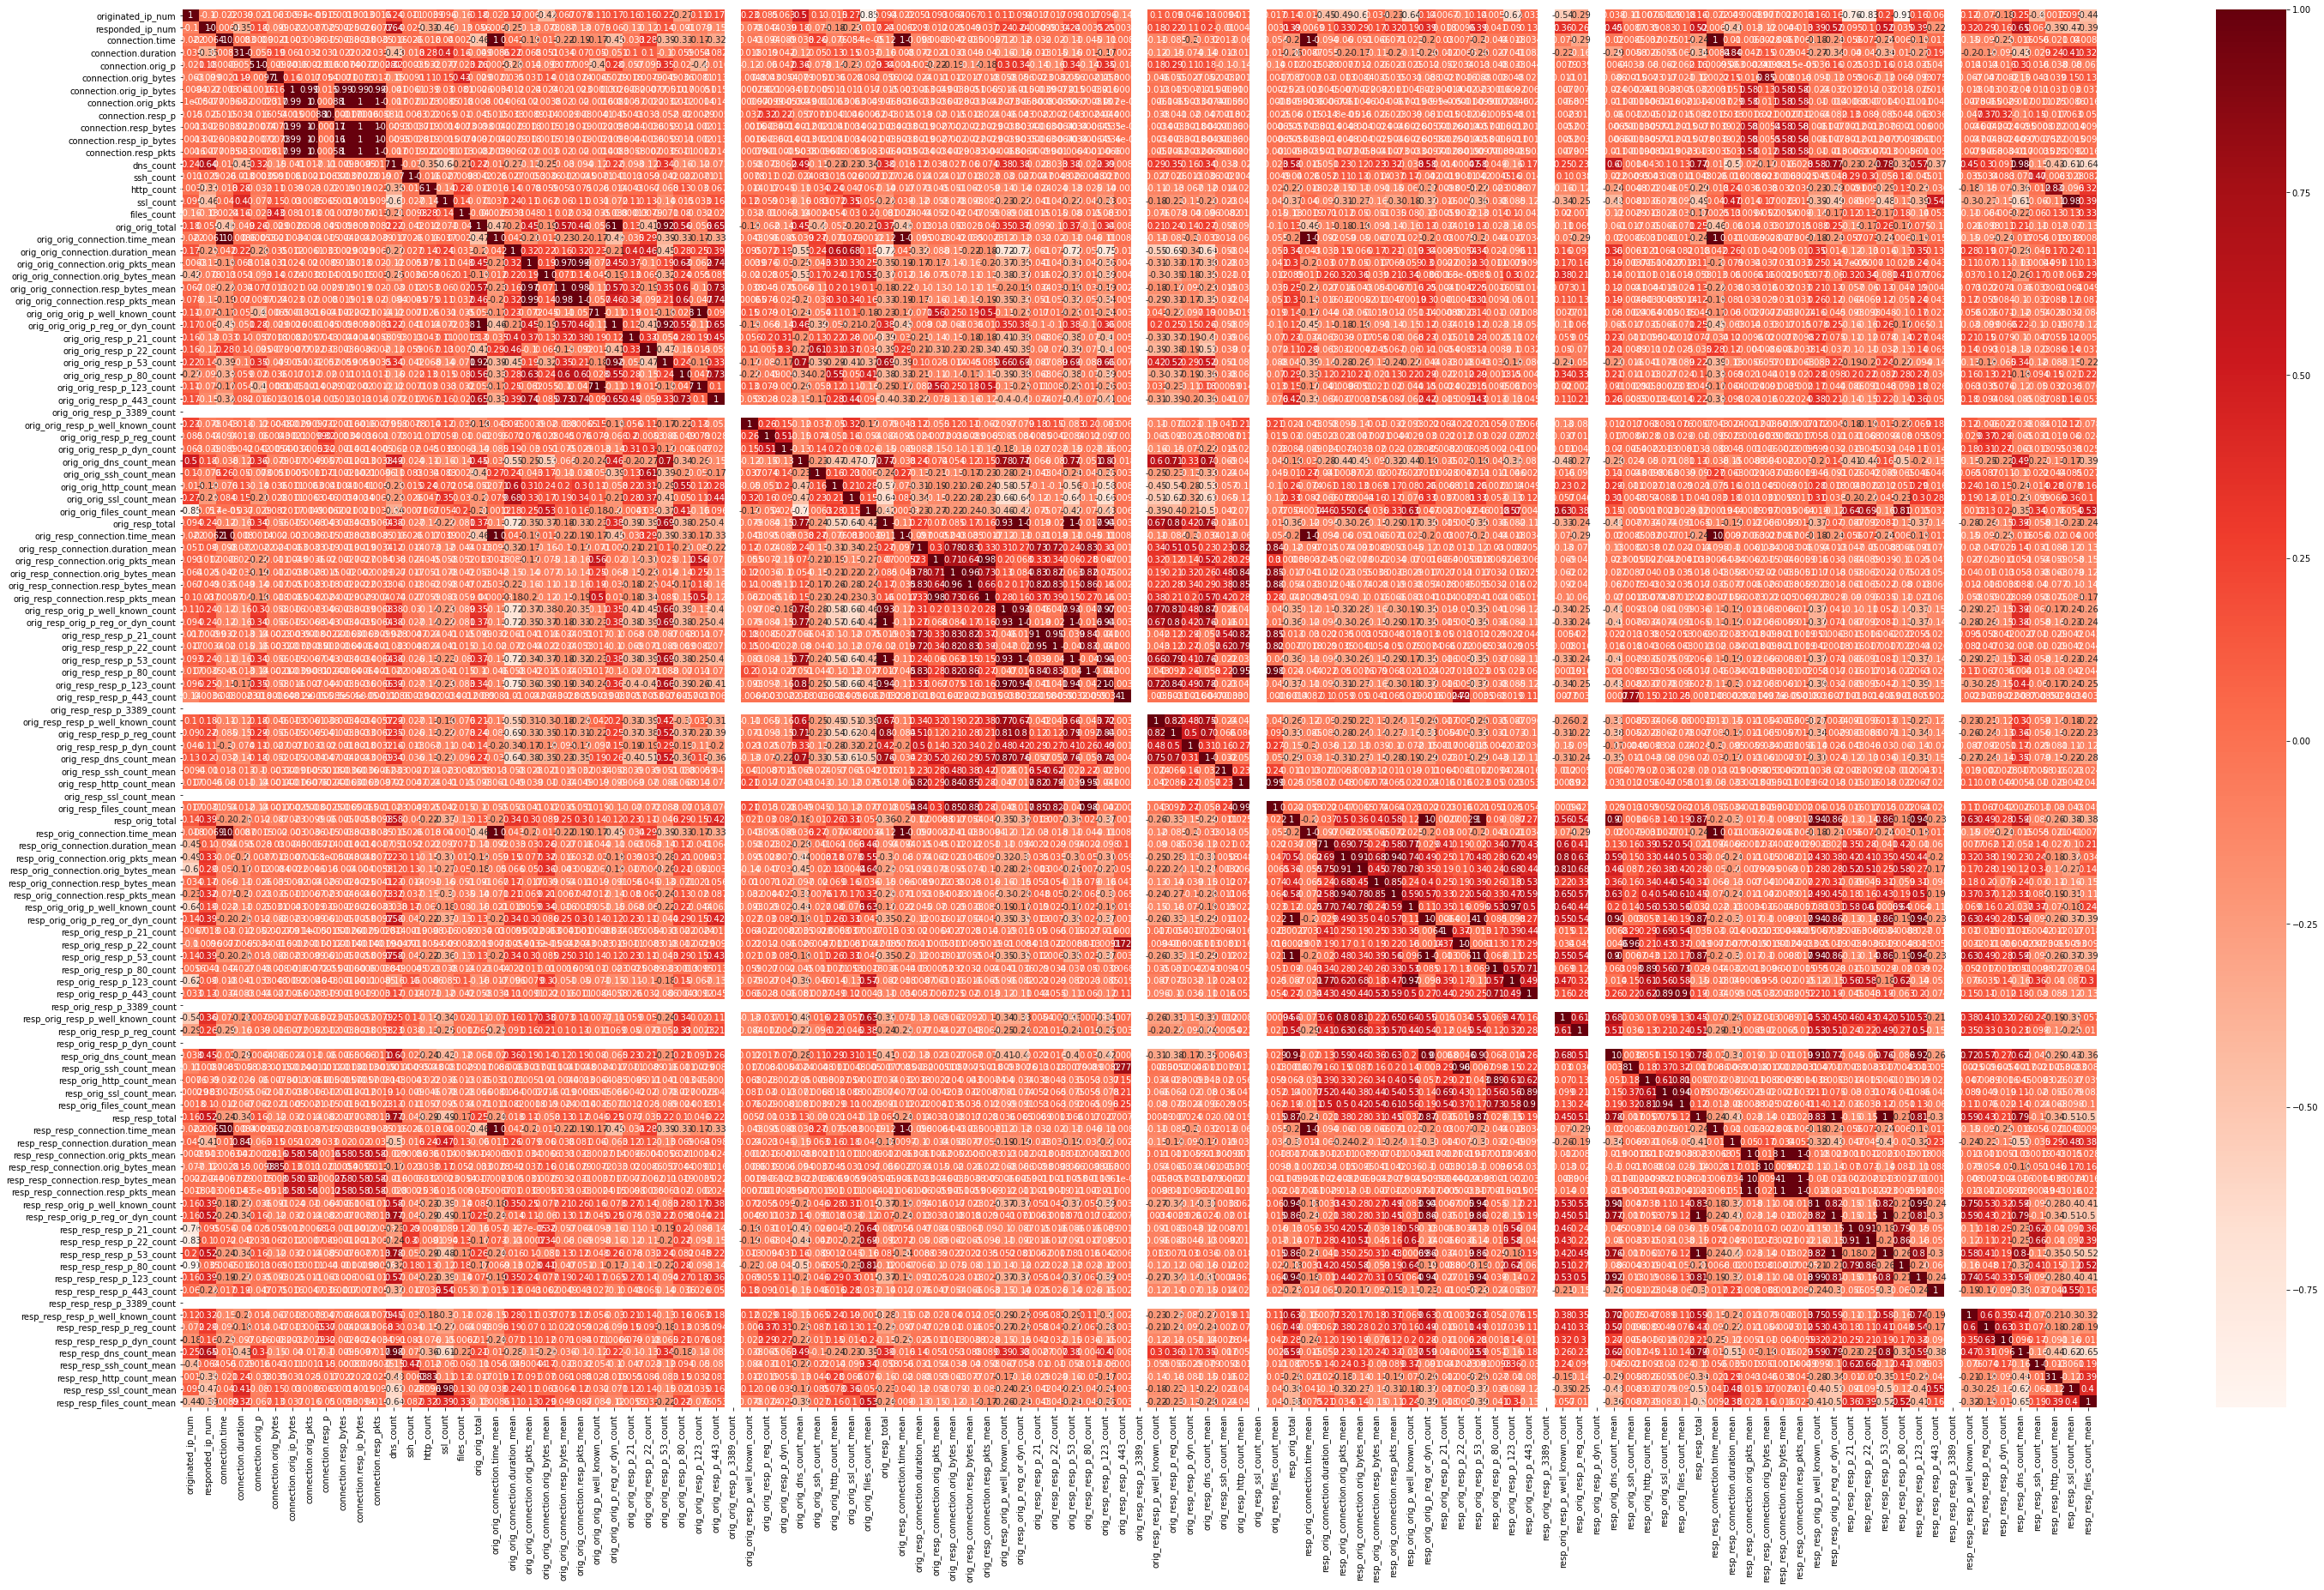

In [47]:
import seaborn as sns

# (https://medium.com/@sadievrenseker/preprocessing-end-to-end-data-preprocessing-1b0672087977)

plt.figure(figsize=(50,30))
cor = result_numerical.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## 5. Write the result to file

In [48]:
pd.reset_option('display.max_rows')

In [49]:
result_final = pd.concat([result, data_orig], axis=1)
result_final

originated_ip_num  responded_ip_num  connection.time  \
0               1.000000          0.409401         0.058943   
1               1.000000          0.699593         0.058960   
2               1.000000          0.767394         0.099804   
3               1.000000          0.063199         0.107694   
4               1.000000          0.857470         0.087744   
...                  ...               ...              ...   
40736           0.751489          0.857470         0.993226   
40737           0.751489          0.857470         0.994294   
40738           0.751489          0.857470         0.941219   
40739           0.751489          0.857470         0.945797   
40740           0.751489          0.857470         0.958799   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0             2.979769e-02           0.754101               0.001388   
1             2.978088e-02           0.754193               0.002531   
2             1.967004e-04           0.755658               0.003648   
3             1.757533e-05           0.001831               0.000077   
4             3.450318e-08           0.750713               0.000000   
...                    ...                ...                    ...   
40736         3.926344e-03           0.927790               0.000000   
40737         4.039283e-03           0.928400               0.000000   
40738         4.042058e-03           0.897209               0.000000   
40739         3.693378e-03           0.899895               0.000000   
40740         3.848215e-03           0.907555               0.000000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.000301              0.000160           0.006835   
1                      0.000481              0.000180           0.006835   
2                      0.000472              0.000083           0.006835   
3                      0.000012              0.000006           0.001864   
4                      0.000000              0.000000           0.002082   
...                         ...                   ...                ...   
40736                  0.000034              0.000026           0.001196   
40737                  0.000034              0.000026           0.001196   
40738                  0.000034              0.000026           0.001196   
40739                  0.000034              0.000026           0.001196   
40740                  0.000034              0.000026           0.001196   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0               1.204375e-04              1.218683e-04              0.000245   
1               5.562014e-05              5.738097e-05              0.000162   
2               5.135246e-06              5.827656e-06              0.000050   
3               7.655025e-08              1.198328e-07              0.000006   
4               1.977548e-07              2.838144e-07              0.000011   
...                      ...                       ...                   ...   
40736           0.000000e+00              1.765956e-07              0.000011   
40737           0.000000e+00              1.765956e-07              0.000011   
40738           0.000000e+00              1.765956e-07              0.000011   
40739           0.000000e+00              1.765956e-07              0.000011   
40740           0.000000e+00              1.765956e-07              0.000011   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        1.0     0.029703   
1            0.0        0.0         0.0        1.0     0.019802   
2            0.0        0.0         0.0        1.0     0.000000   
3            0.0        0.0         0.0        0.0     0.000000   
4            1.0        0.0         0.0        0.0     0.000000   
...          ...        ...         ...        ...          ...   
40736        0.0        0.0         0.0   

In [51]:
result_final.to_csv(PREFIX_PATH + 'final.csv', index=False, header=True)